Instructor: Nikhil Muralidhar

Course: CS 556-C: Mathematical Foundations of Machine Learning

Homework 2: Linear Algebra, Dimensionality Reduction, Probability & Differential Calculus, Problem 4

Student: John Rizzo

In [10]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

import seaborn as sns

In [11]:
iris = load_iris(as_frame=True)
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


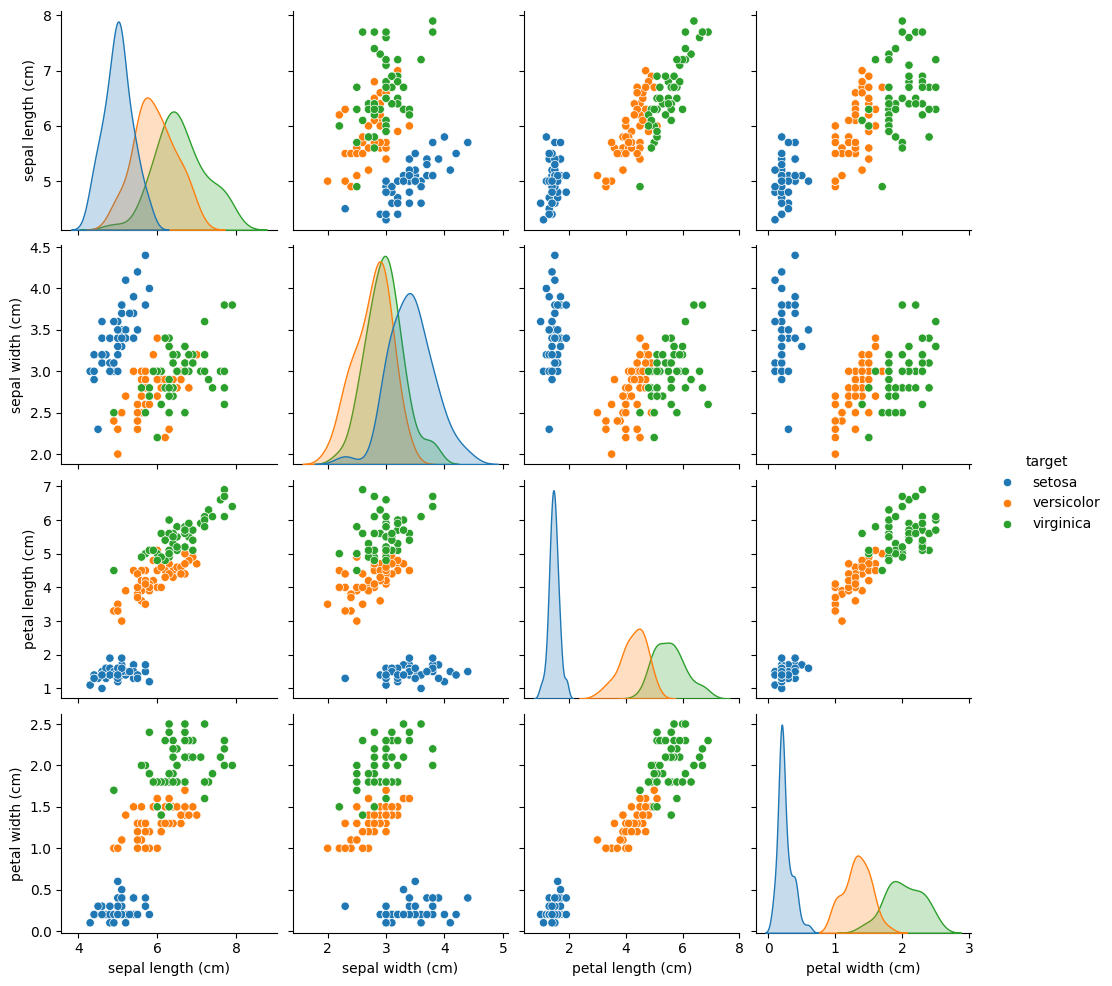

In [12]:
# Rename classes using the iris target names
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")

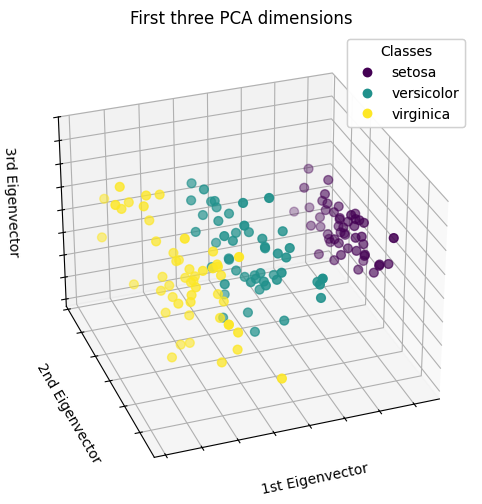

In [13]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

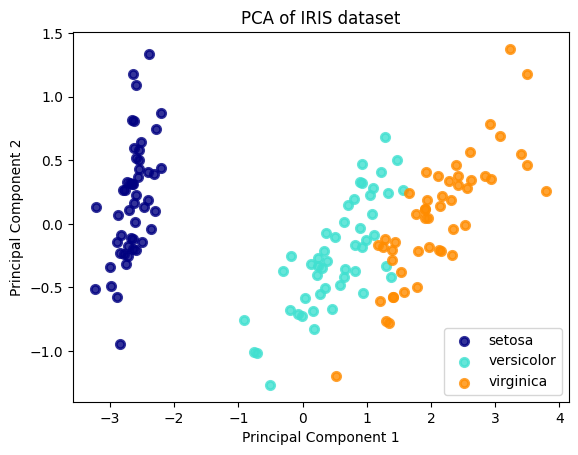

(b) Total variance captured by the first 2 components: 0.9777
(c) Strength of PC1: 4.2282
(c) Strength of PC2: 0.2427
(d) Magnitude of PC1: 1.0000
(d) Magnitude of PC2: 1.0000


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# (a) 2D Scatter Plot
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# (b) Total Variance Captured
total_variance_captured = sum(pca.explained_variance_ratio_)
print(f"(b) Total variance captured by the first 2 components: {total_variance_captured:.4f}")

# (c) Strength of Principal Components
strength_pc1 = pca.explained_variance_[0]
strength_pc2 = pca.explained_variance_[1]
print(f"(c) Strength of PC1: {strength_pc1:.4f}")
print(f"(c) Strength of PC2: {strength_pc2:.4f}")

# (d) Magnitude of Principal Components
magnitude_pc1 = np.linalg.norm(pca.components_[0])
magnitude_pc2 = np.linalg.norm(pca.components_[1])
print(f"(d) Magnitude of PC1: {magnitude_pc1:.4f}")
print(f"(d) Magnitude of PC2: {magnitude_pc2:.4f}")